# Clustering

### MLXTEND

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[1, 3]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show();

/home/jatin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<Figure size 1000x800 with 4 Axes>

## Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets.samples_generator import make_blobs

In [4]:
X, y = make_blobs(n_samples=600, centers=5, cluster_std=0.6, random_state=42)

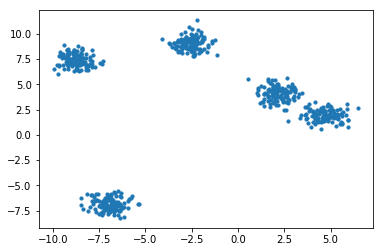

In [5]:
plt.scatter(X[:, 0], X[:, 1], s=10);

In [6]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

In [7]:
distance = linkage(X, 'ward')

### Dendrogram

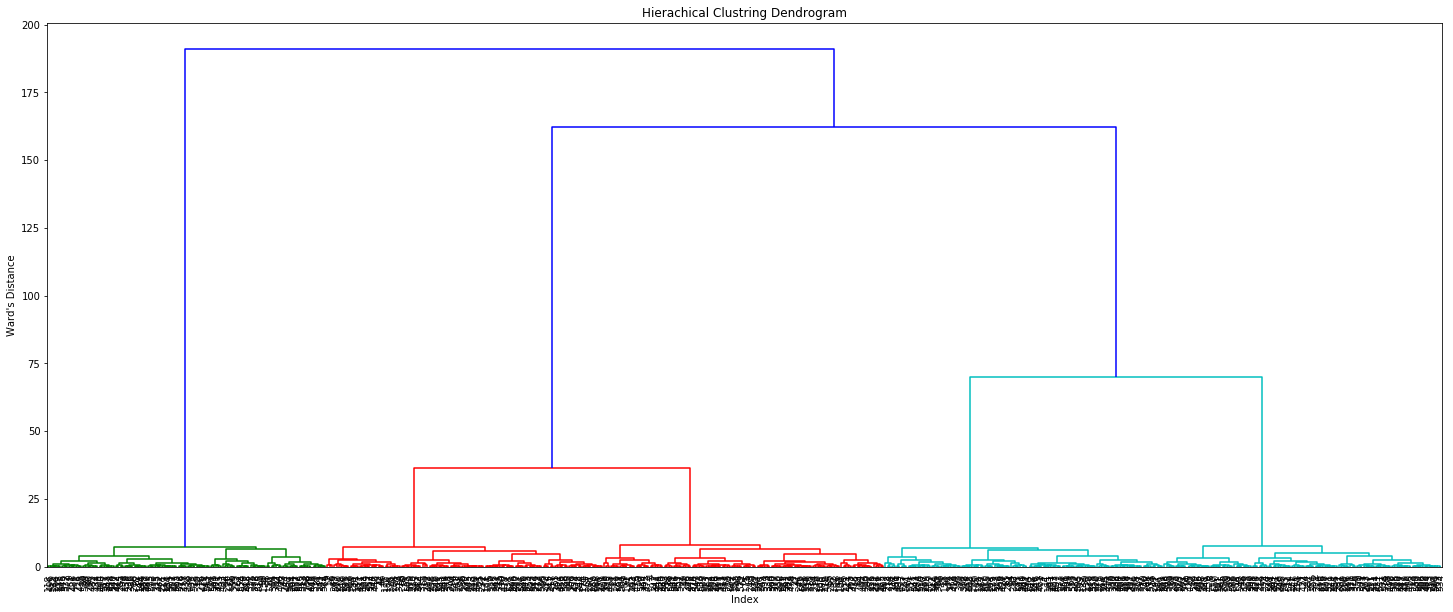

In [8]:
plt.figure(figsize=(25,10))
plt.title('Hierachical Clustring Dendrogram')
plt.xlabel('Index')
plt.ylabel('Ward\'s Distance')
dendrogram(distance, leaf_rotation=90, leaf_font_size=9);

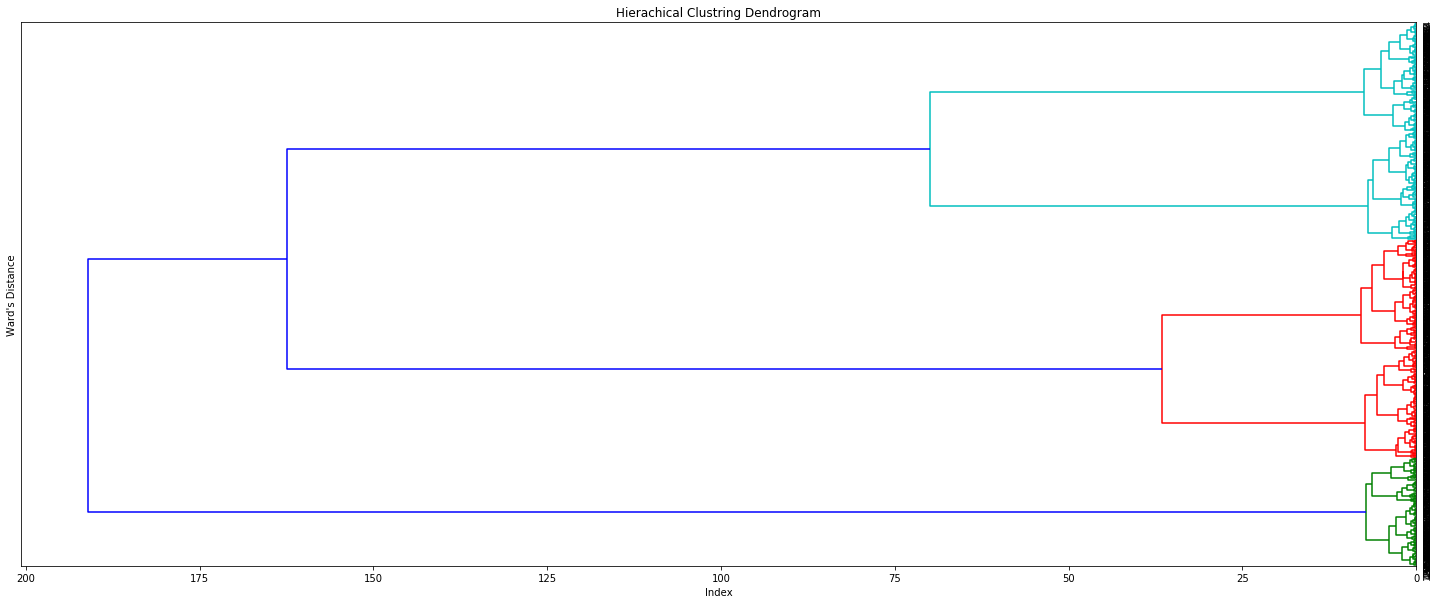

In [9]:
plt.figure(figsize=(25,10))
plt.title('Hierachical Clustring Dendrogram')
plt.xlabel('Index')
plt.ylabel('Ward\'s Distance')
dendrogram(distance,orientation='left', leaf_rotation=90, leaf_font_size=9);

***

## Truncating Dendrogram 

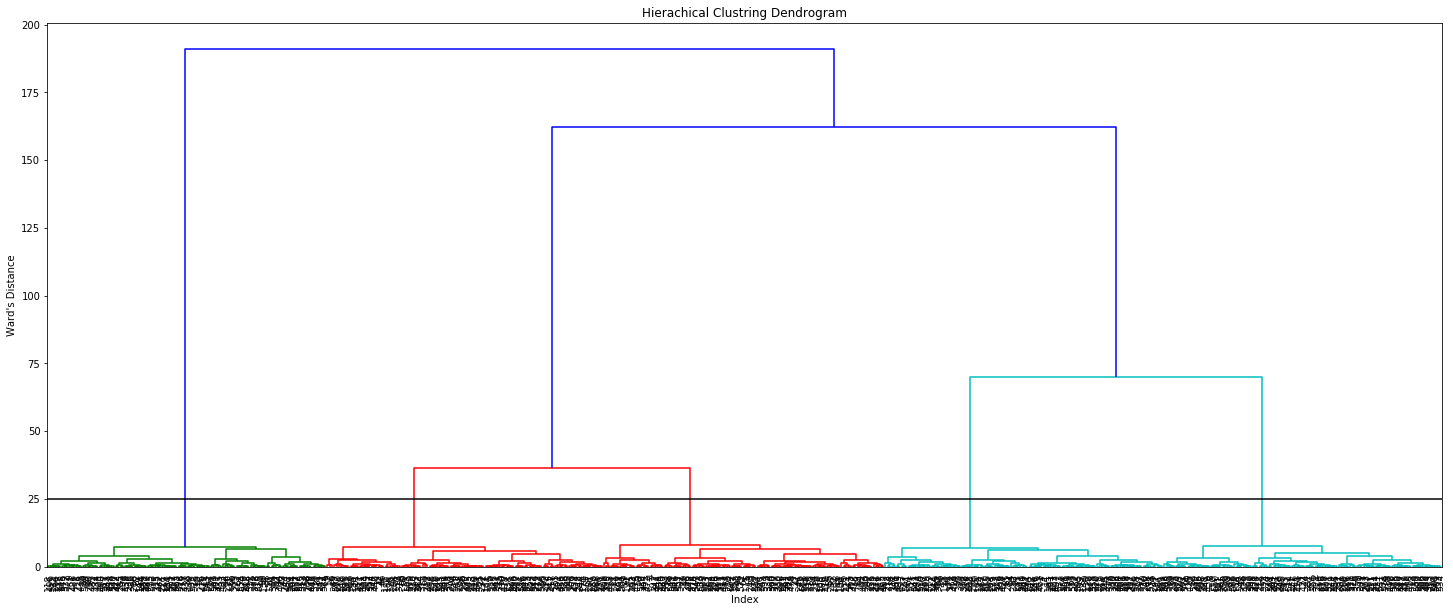

In [10]:
plt.figure(figsize=(25,10))
plt.title('Hierachical Clustring Dendrogram')
plt.xlabel('Index')
plt.ylabel('Ward\'s Distance')
dendrogram(distance, leaf_rotation=90, leaf_font_size=9);
plt.axhline(25, c='k');

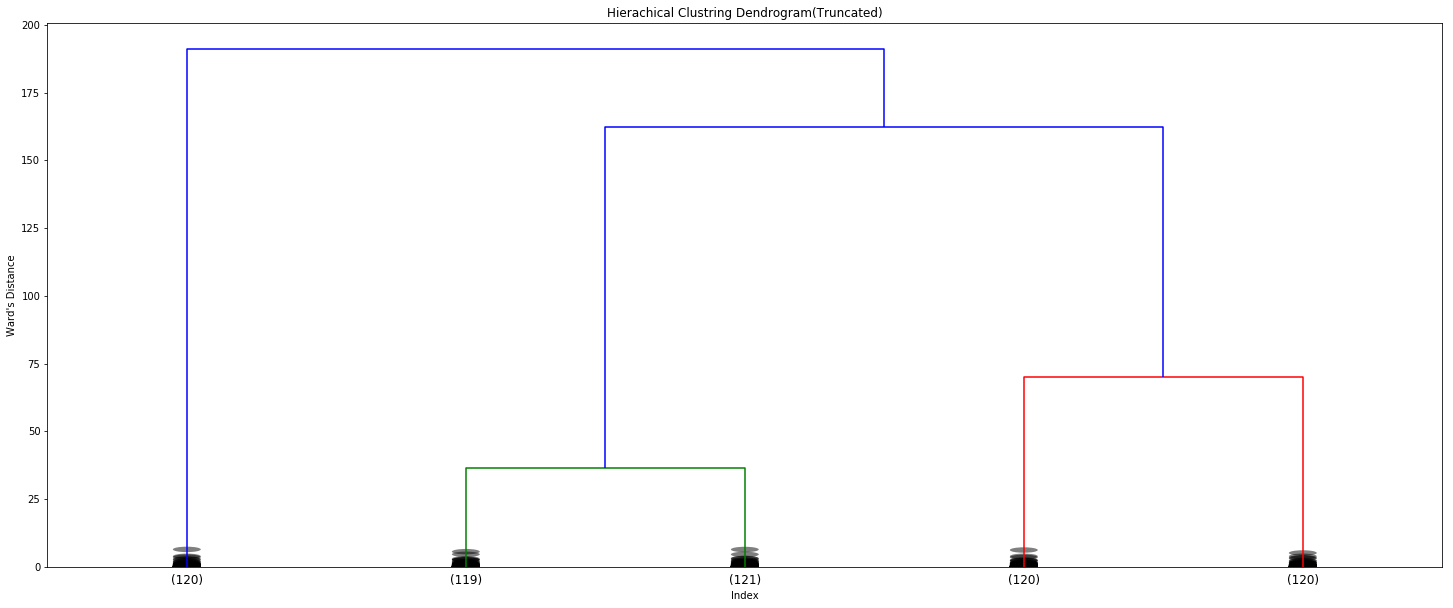

In [11]:
plt.figure(figsize=(25,10))
plt.title('Hierachical Clustring Dendrogram(Truncated)')
plt.xlabel('Index')
plt.ylabel('Ward\'s Distance')
dendrogram(distance,truncate_mode='lastp',p=5, leaf_rotation=0, leaf_font_size=12, show_contracted=True);

### Retrieve The Clusters
### By Distance

In [12]:
from scipy.cluster.hierarchy import fcluster
max_d = 25
clusters = fcluster(distance, max_d, criterion='distance')
clusters

array([1, 1, 5, 3, 3, 2, 3, 4, 5, 2, 1, 5, 2, 4, 4, 1, 4, 3, 5, 3, 4, 3,
       2, 5, 5, 2, 2, 3, 3, 3, 1, 4, 5, 1, 1, 3, 2, 2, 1, 4, 3, 2, 2, 1,
       1, 2, 2, 3, 5, 3, 4, 2, 1, 2, 4, 3, 4, 1, 1, 3, 2, 4, 1, 4, 3, 2,
       1, 3, 2, 2, 5, 3, 1, 3, 5, 1, 4, 5, 1, 5, 3, 1, 1, 3, 3, 4, 3, 1,
       5, 5, 5, 1, 4, 4, 2, 2, 4, 4, 3, 1, 3, 5, 4, 5, 5, 1, 3, 4, 3, 4,
       4, 5, 4, 3, 5, 2, 5, 4, 1, 1, 5, 5, 3, 3, 2, 4, 4, 4, 5, 2, 2, 1,
       1, 4, 3, 4, 2, 2, 2, 1, 5, 2, 2, 1, 4, 5, 4, 1, 2, 1, 5, 2, 1, 4,
       1, 4, 2, 3, 5, 5, 3, 3, 3, 4, 2, 4, 4, 3, 4, 1, 2, 2, 2, 4, 4, 3,
       2, 3, 4, 3, 2, 5, 3, 1, 1, 2, 4, 2, 5, 5, 2, 3, 4, 3, 1, 2, 5, 3,
       4, 2, 5, 4, 3, 5, 3, 5, 1, 1, 2, 2, 3, 3, 2, 3, 4, 1, 1, 5, 4, 2,
       2, 1, 5, 2, 5, 4, 1, 4, 3, 5, 2, 4, 2, 5, 3, 1, 1, 4, 4, 5, 4, 2,
       1, 3, 1, 3, 3, 4, 2, 2, 2, 1, 4, 5, 2, 3, 5, 1, 2, 2, 2, 4, 3, 1,
       3, 5, 1, 4, 4, 2, 2, 2, 1, 2, 3, 1, 3, 4, 5, 1, 5, 4, 5, 4, 4, 1,
       5, 2, 2, 3, 1, 1, 2, 1, 1, 5, 1, 3, 5, 4, 4,

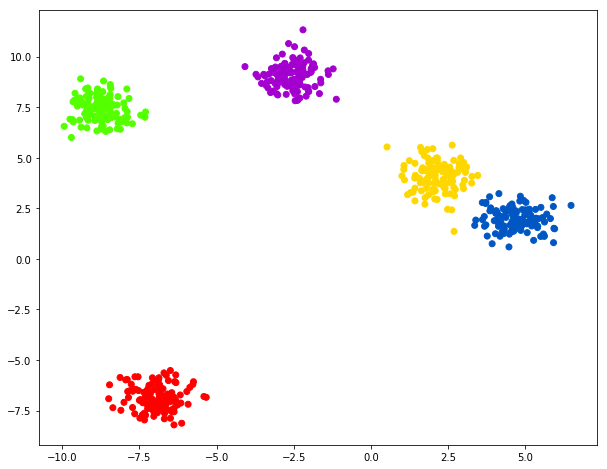

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism');

### By Clusters

In [14]:
k = 5
clusters = fcluster(distance, k, criterion='maxclust')

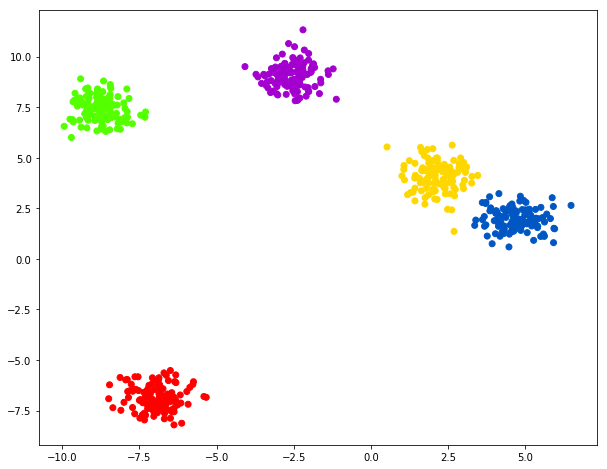

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism');

***

# K-Means Clustering

In [16]:
from sklearn.cluster import KMeans

In [42]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
y_kmeans = kmeans.predict(X)

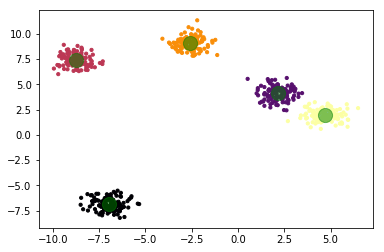

In [44]:
plt.scatter(X[:, 0], X[:, 1],c=y_kmeans, s = 10, cmap='inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], s=200, c = 'green', alpha=0.5);

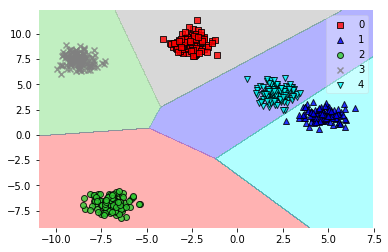

In [45]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf = kmeans);

***
## Elbow Method

In [46]:
kmeans.inertia_

414.4338493499473

In [49]:
sse_ = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])


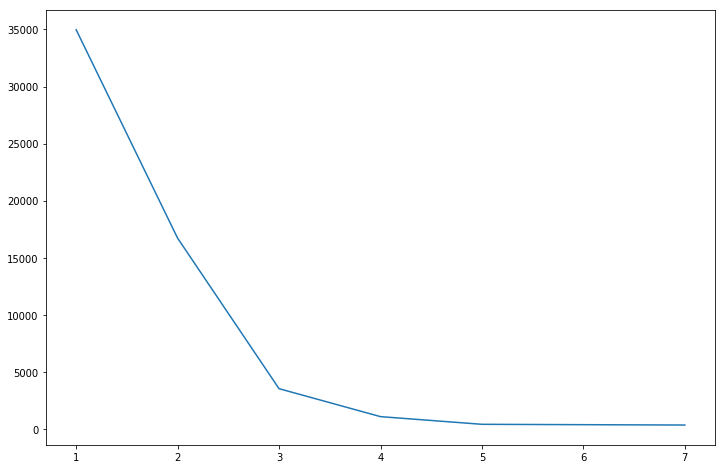

In [53]:
plt.figure(figsize=(12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Silhouette Analysis

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

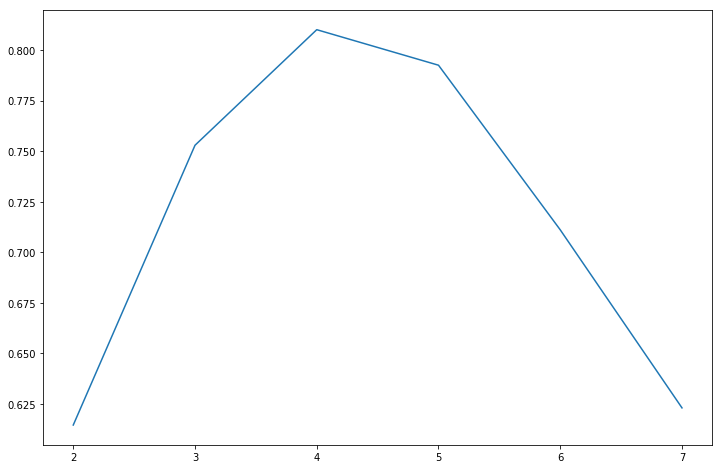

In [56]:
plt.figure(figsize=(12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Mean Shift Method

In [57]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [58]:
from itertools import cycle

In [59]:
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [60]:
meanshift = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift.fit(X)

MeanShift(bandwidth=0.9946702350329211, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [64]:
clusters_centers = meanshift.cluster_centers_

In [65]:
print('\nCluster Centers : \n', clusters_centers)


Cluster Centers : 
 [[-2.6733  8.9994]
 [ 4.6837  1.9518]
 [-8.789   7.4687]
 [ 2.2375  4.1844]
 [-6.9235 -7.0323]]


In [66]:
labels = meanshift.labels_
num_clusters = len(np.unique(labels))
print('\nNumber of Clusters : ', num_clusters)


Number of Clusters :  5


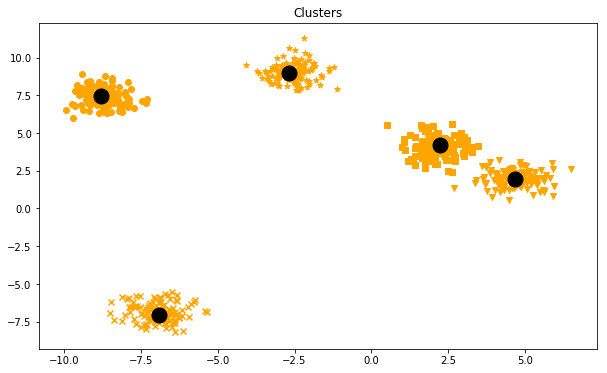

In [72]:
plt.figure(figsize=(10, 6))
markers='*vosx'
for i, markers in zip(range(num_clusters), markers):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], marker=markers, color='orange')
    cluster_center = clusters_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o', markerfacecolor='black', markeredgecolor='black', markersize=15)
plt.title('Clusters');